#Import Packages


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


#Read Data

In [ ]:
data = pd.read_csv("/content/Students_Grading_Dataset.csv")
data.head()

Student_ID First_Name Last_Name                    Email  Gender  Age  \
0      S1000       Omar  Williams  student0@university.com  Female   22   
1      S1001      Maria     Brown  student1@university.com    Male   18   
2      S1002      Ahmed     Jones  student2@university.com    Male   24   
3      S1003       Omar  Williams  student3@university.com  Female   24   
4      S1004       John     Smith  student4@university.com  Female   23   

    Department  Attendance (%)  Midterm_Score  Final_Score  ...  \
0  Engineering           52.29          55.03        57.82  ...   
1  Engineering           97.27          97.23        45.80  ...   
2     Business           57.19          67.05        93.68  ...   
3  Mathematics           95.15          47.79        80.63  ...   
4           CS           54.18          46.59        78.89  ...   

   Projects_Score  Total_Score  Grade  Study_Hours_per_Week  \
0           85.90        56.09      F                   6.2   
1           55.65        50.64      A                  19.0   
2           73.79        70.30      D                  20.7   
3           92.12        61.63      A                  24.8   
4           68.42        66.13      F                  15.4   

   Extracurricular_Activities Internet_Access_at_Home  Parent_Education_Level  \
0                          No                     Yes             High School   
1                          No                     Yes                     NaN   
2                          No                     Yes                Master's   
3                         Yes                     Yes             High School   
4                         Yes                     Yes             High School   

  Family_Income_Level Stress_Level (1-10) Sleep_Hours_per_Night  
0              Medium                   5                   4.7  
1              Medium                   4                   9.0  
2                 Low                   6                   6.2  
3                High                   3                   6.7  
4                High                   2                   7.1  

[5 rows x 23 columns]

#ُExploring Data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              4484 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             4483 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [ ]:
data.describe()

Age  Attendance (%)  Midterm_Score  Final_Score  \
count  5000.000000     4484.000000    5000.000000  5000.000000   
mean     21.048400       75.431409      70.326844    69.640788   
std       1.989786       14.372446      17.213209    17.238744   
min      18.000000       50.010000      40.000000    40.000000   
25%      19.000000       63.265000      55.457500    54.667500   
50%      21.000000       75.725000      70.510000    69.735000   
75%      23.000000       87.472500      84.970000    84.500000   
max      24.000000      100.000000      99.980000    99.980000   

       Assignments_Avg  Quizzes_Avg  Participation_Score  Projects_Score  \
count      4483.000000  5000.000000          5000.000000     5000.000000   
mean         74.798673    74.910728             4.980024       74.924860   
std          14.411799    14.504281             2.890136       14.423415   
min          50.000000    50.030000             0.000000       50.010000   
25%          62.090000    62.490000             2.440000       62.320000   
50%          74.810000    74.695000             4.955000       74.980000   
75%          86.970000    87.630000             7.500000       87.367500   
max          99.980000    99.960000            10.000000      100.000000   

       Total_Score  Study_Hours_per_Week  Stress_Level (1-10)  \
count  5000.000000           5000.000000           5000.00000   
mean     75.121804             17.658860              5.48080   
std      14.399941              7.275864              2.86155   
min      50.020000              5.000000              1.00000   
25%      62.835000             11.400000              3.00000   
50%      75.395000             17.500000              5.00000   
75%      87.652500             24.100000              8.00000   
max      99.990000             30.000000             10.00000   

       Sleep_Hours_per_Night  
count            5000.000000  
mean                6.488140  
std                 1.452283  
min                 4.000000  
25%                 5.200000  
50%                 6.500000  
75%                 7.700000  
max                 9.000000

In [ ]:
important_features = [
    "Attendance (%)",
    "Midterm_Score",
    "Assignments_Avg",
    "Quizzes_Avg",
    "Participation_Score",
    "Projects_Score",
    "Final_Score",
    "Study_Hours_per_Week",
    "Stress_Level (1-10)",
    "Sleep_Hours_per_Night"]

target ="Total_Score"

In [ ]:
data.isnull().sum()

Student_ID                       0
First_Name                       0
Last_Name                        0
Email                            0
Gender                           0
Age                              0
Department                       0
Attendance (%)                 516
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                517
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1794
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64

#Nulls Distribution

In [ ]:
print(data['Parent_Education_Level'].unique())


['High School' nan "Master's" 'PhD' "Bachelor's"]


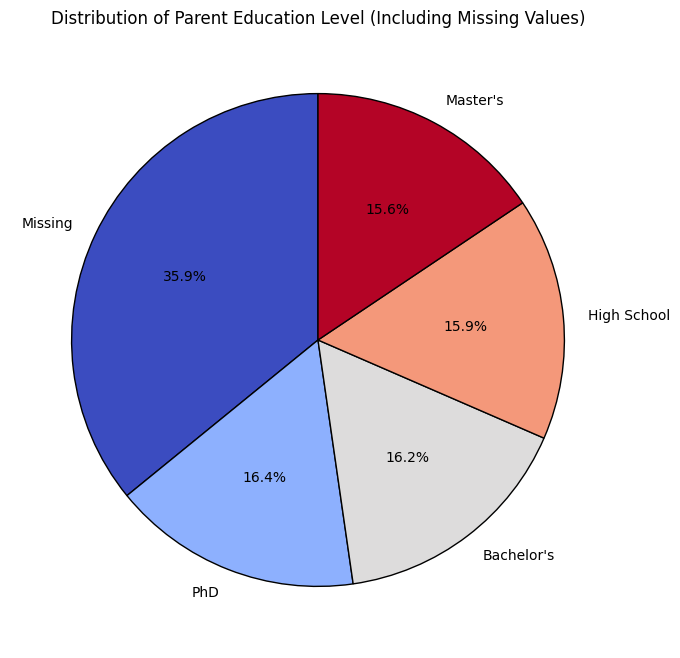

In [ ]:
plt.figure(figsize=(8, 8))


data['Parent_Education_Level'].fillna('Missing').value_counts().plot(
    kind='pie', autopct='%1.1f%%', startangle=90, cmap='coolwarm', wedgeprops={'edgecolor': 'black'}
)

plt.title('Distribution of Parent Education Level (Including Missing Values)')
plt.ylabel('')
plt.show()


In [ ]:
def plot_distripution(data):

      numerical_cols = data.select_dtypes(include=['number']).columns
      histo_num_features = len(numerical_cols)
      histo_rows = (histo_num_features // 3) + (histo_num_features % 3 > 0)
      histo_cols = min(3, histo_num_features)

      fig, axes = plt.subplots(histo_rows, histo_cols, figsize=(12, 8))
      axes = axes.flatten()

      for i, col in enumerate(numerical_cols):
          sns.histplot(data[col], bins=20, kde=True, ax=axes[i])
          axes[i].set_title(f'Distribution of {col}')

      for j in range(i + 1, len(axes)):
          fig.delaxes(axes[j])

      plt.tight_layout()
      plt.show()


def check_outliers_by_boxplot(data):
      numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

      plt.figure(figsize=(12, 6))
      sns.boxplot(data=data[numeric_columns], showfliers=True)
      plt.xticks(rotation=45)
      plt.title("Boxplot for All Numeric Columns")
      plt.show()

def plot_correlation_matrix(data):
    numeric_data = data.select_dtypes(include=['int64', 'float64'])
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title("Correlation Matrix")
    plt.show()


def plot_scatter_matrix_features(data, target, important_features):

    scatter_num_features = len(important_features)
    scatter_rows = (scatter_num_features // 3) + (scatter_num_features % 3 > 0)
    scatter_cols = min(3, scatter_num_features)

    fig, axes = plt.subplots(scatter_rows, scatter_cols, figsize=(15, 20))
    axes = axes.flatten()

    for i, feature  in enumerate(important_features):
        sns.scatterplot(x=data[feature], y=data[target], ax=axes[i], alpha=0.5)
        axes[i].set_title(f'{feature} vs {target}')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()



def plot_pie_chart(data, column, title):
  plt.figure(figsize=(8, 8))

  data[column].value_counts().plot(
      kind='pie', autopct='%1.1f%%', startangle=90, cmap='coolwarm', wedgeprops={'edgecolor': 'black'}
  )

  plt.title(title)
  plt.ylabel('')
  plt.show()


def plot_clustered_distribution(data, feature, group_by_col, xlabel, title_count, title_percentage):


    plt.figure(figsize=(12, 6))

    categories = data[group_by_col].unique()
    colors = sns.color_palette("tab10", len(categories))

    feature_counts = data.groupby([feature, group_by_col]).size().unstack(fill_value=0)

    width = 0.15
    x = np.arange(len(feature_counts))

    fig, ax = plt.subplots(figsize=(12, 6))

    for i, category in enumerate(categories):
        ax.bar(x + i * width, feature_counts[category], width=width, label=category, color=colors[i], alpha=0.8, edgecolor="black")


    ax.set_xticks(x + width * (len(categories) / 2))
    ax.set_xticklabels(feature_counts.index, rotation=0)
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Number of Students")
    ax.set_title(title_count)
    ax.legend(title=group_by_col)
    ax.grid(axis="y", linestyle="--", alpha=0.5)

    plt.show()

    total_students_per_category = data[group_by_col].value_counts()
    relative_feature = feature_counts.div(total_students_per_category) * 100

    fig, ax = plt.subplots(figsize=(12, 6))

    for i, category in enumerate(categories):
        ax.bar(x + i * width, relative_feature[category], width=width, label=category, color=colors[i], alpha=0.8, edgecolor="black")

    ax.set_xticks(x + width * (len(categories) / 2))
    ax.set_xticklabels(relative_feature.index, rotation=0)
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Percentage of Students")
    ax.set_title(title_percentage)
    ax.legend(title=group_by_col)
    ax.grid(axis="y", linestyle="--", alpha=0.5)

    plt.show()


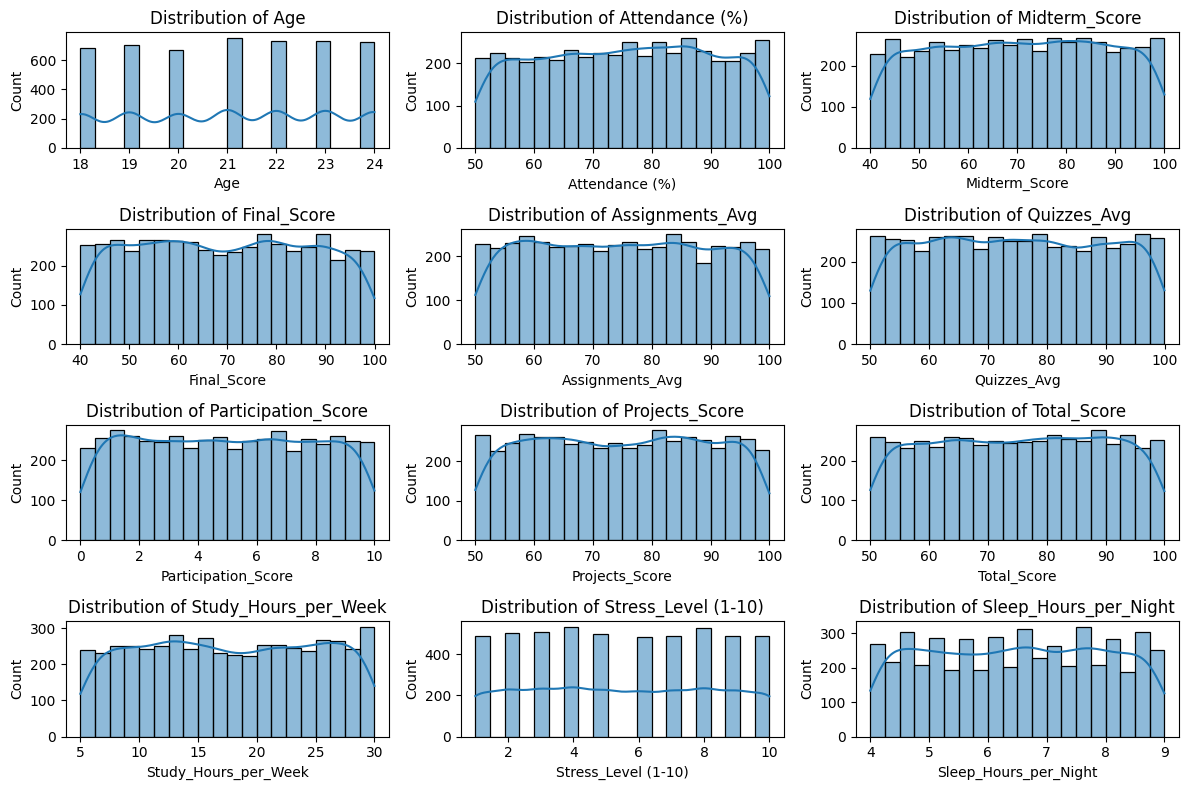

In [ ]:
plot_distripution(data) # data shape

#Outlier Check

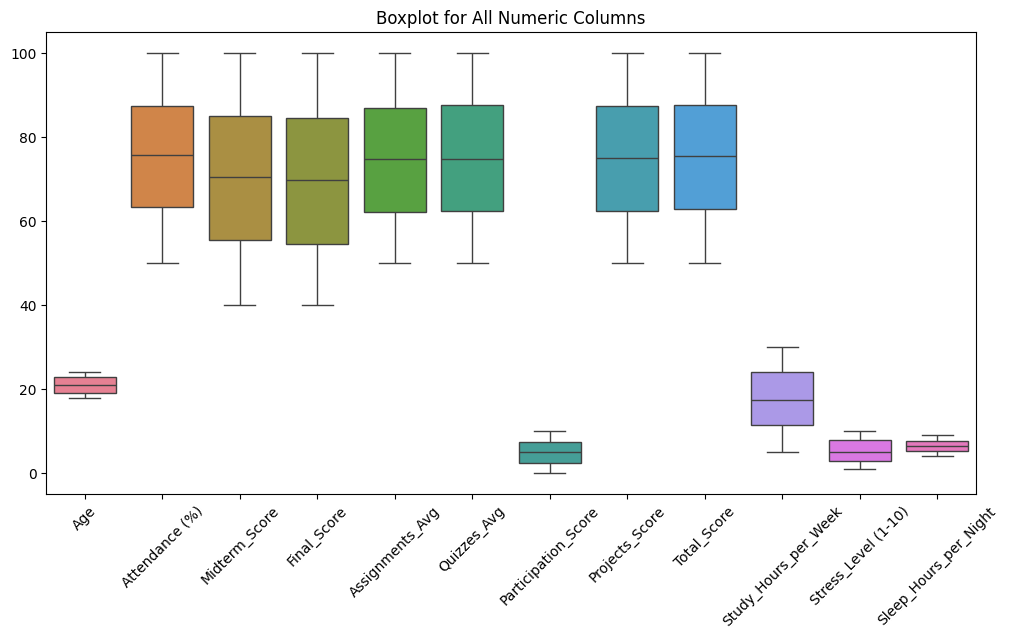

In [ ]:
check_outliers_by_boxplot(data)

#Correlation Matrix

In [ ]:
def plot_correlation_matrix(data):
    numeric_data = data.select_dtypes(include=['int64', 'float64'])
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title("Correlation Matrix")
    plt.show()

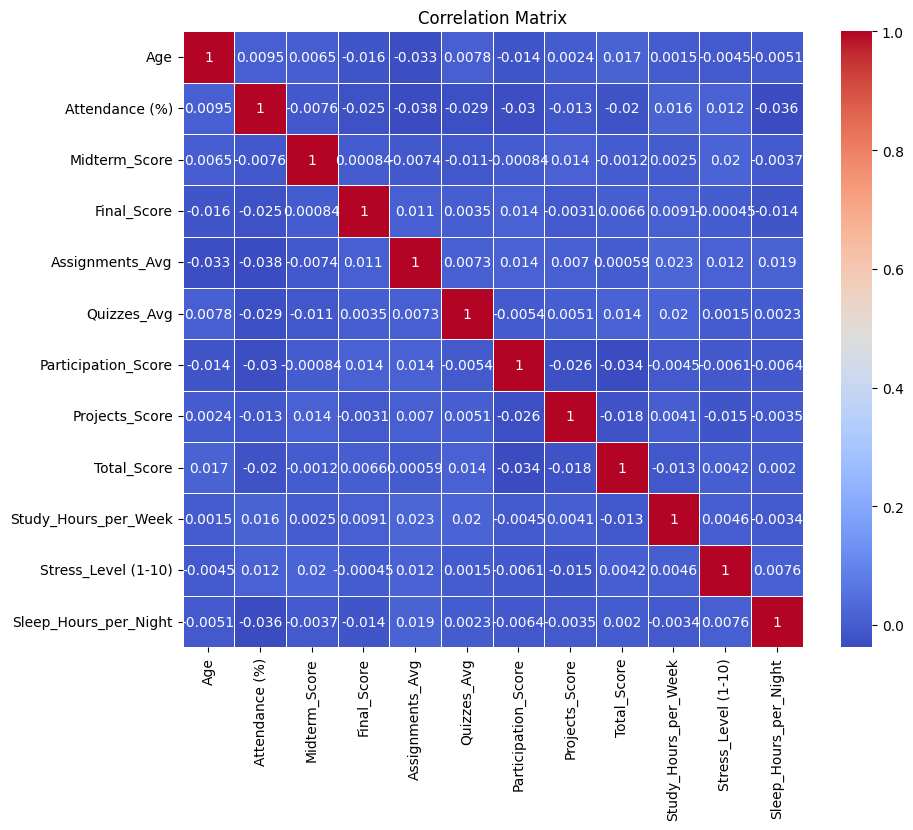

In [ ]:
plot_correlation_matrix(data)

#Fill Nulls

In [ ]:
education_distribution = data['Parent_Education_Level'].value_counts(normalize=True)
missing_count = data['Parent_Education_Level'].isna().sum()
data.loc[data['Parent_Education_Level'].isna(), 'Parent_Education_Level'] = np.random.choice(
    education_distribution.index,
    size=missing_count,
    p=education_distribution.values
)


for col in ['Attendance (%)', 'Assignments_Avg']:
    data.loc[data[col].isnull(), col] = np.random.choice(data[col].dropna(), size=data[col].isnull().sum(), replace=True)

data.isnull().sum()


Student_ID                    0
First_Name                    0
Last_Name                     0
Email                         0
Gender                        0
Age                           0
Department                    0
Attendance (%)                0
Midterm_Score                 0
Final_Score                   0
Assignments_Avg               0
Quizzes_Avg                   0
Participation_Score           0
Projects_Score                0
Total_Score                   0
Grade                         0
Study_Hours_per_Week          0
Extracurricular_Activities    0
Internet_Access_at_Home       0
Parent_Education_Level        0
Family_Income_Level           0
Stress_Level (1-10)           0
Sleep_Hours_per_Night         0
dtype: int64

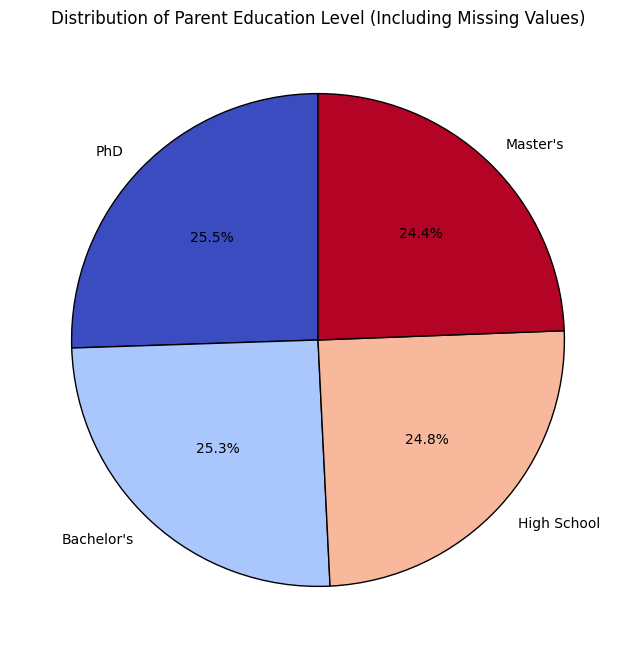

In [ ]:
plt.figure(figsize=(8, 8))


data['Parent_Education_Level'].fillna('Missing').value_counts().plot(
    kind='pie', autopct='%1.1f%%', startangle=90, cmap='coolwarm', wedgeprops={'edgecolor': 'black'}
)

plt.title('Distribution of Parent Education Level (Including Missing Values)')
plt.ylabel('')
plt.show()

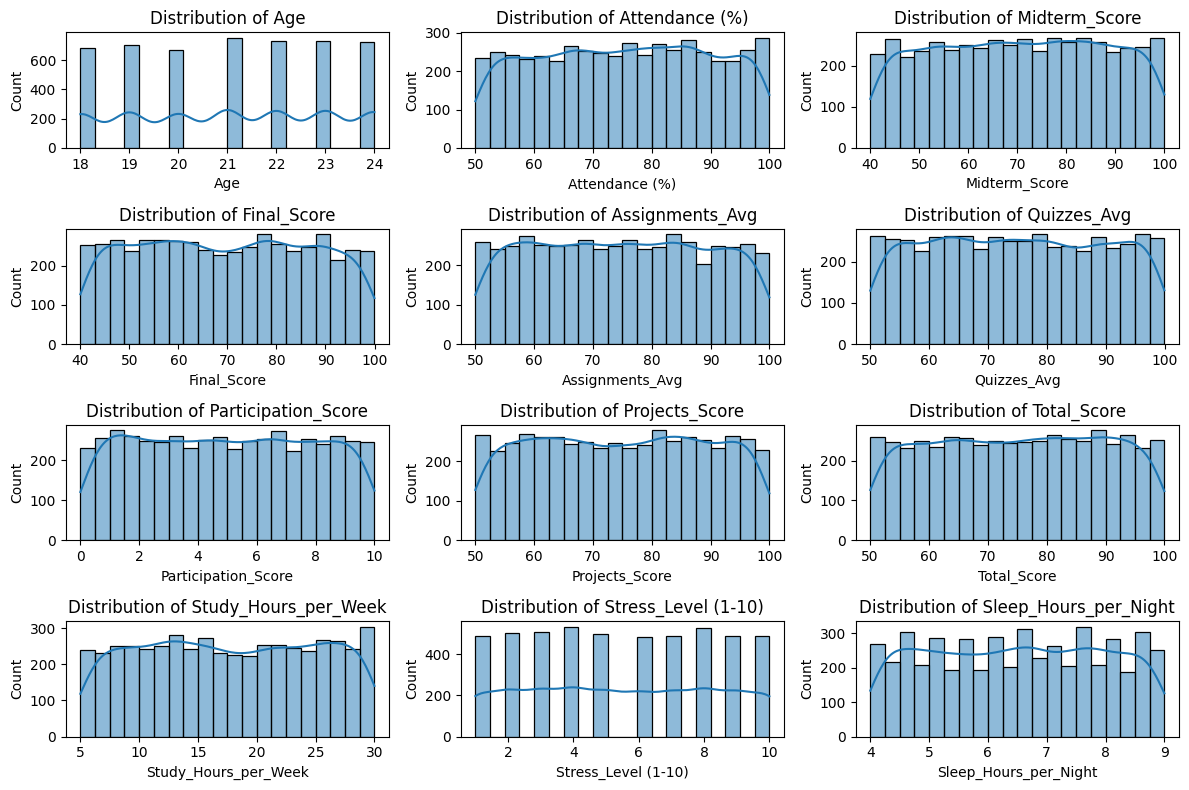

In [ ]:
plot_distripution(data)

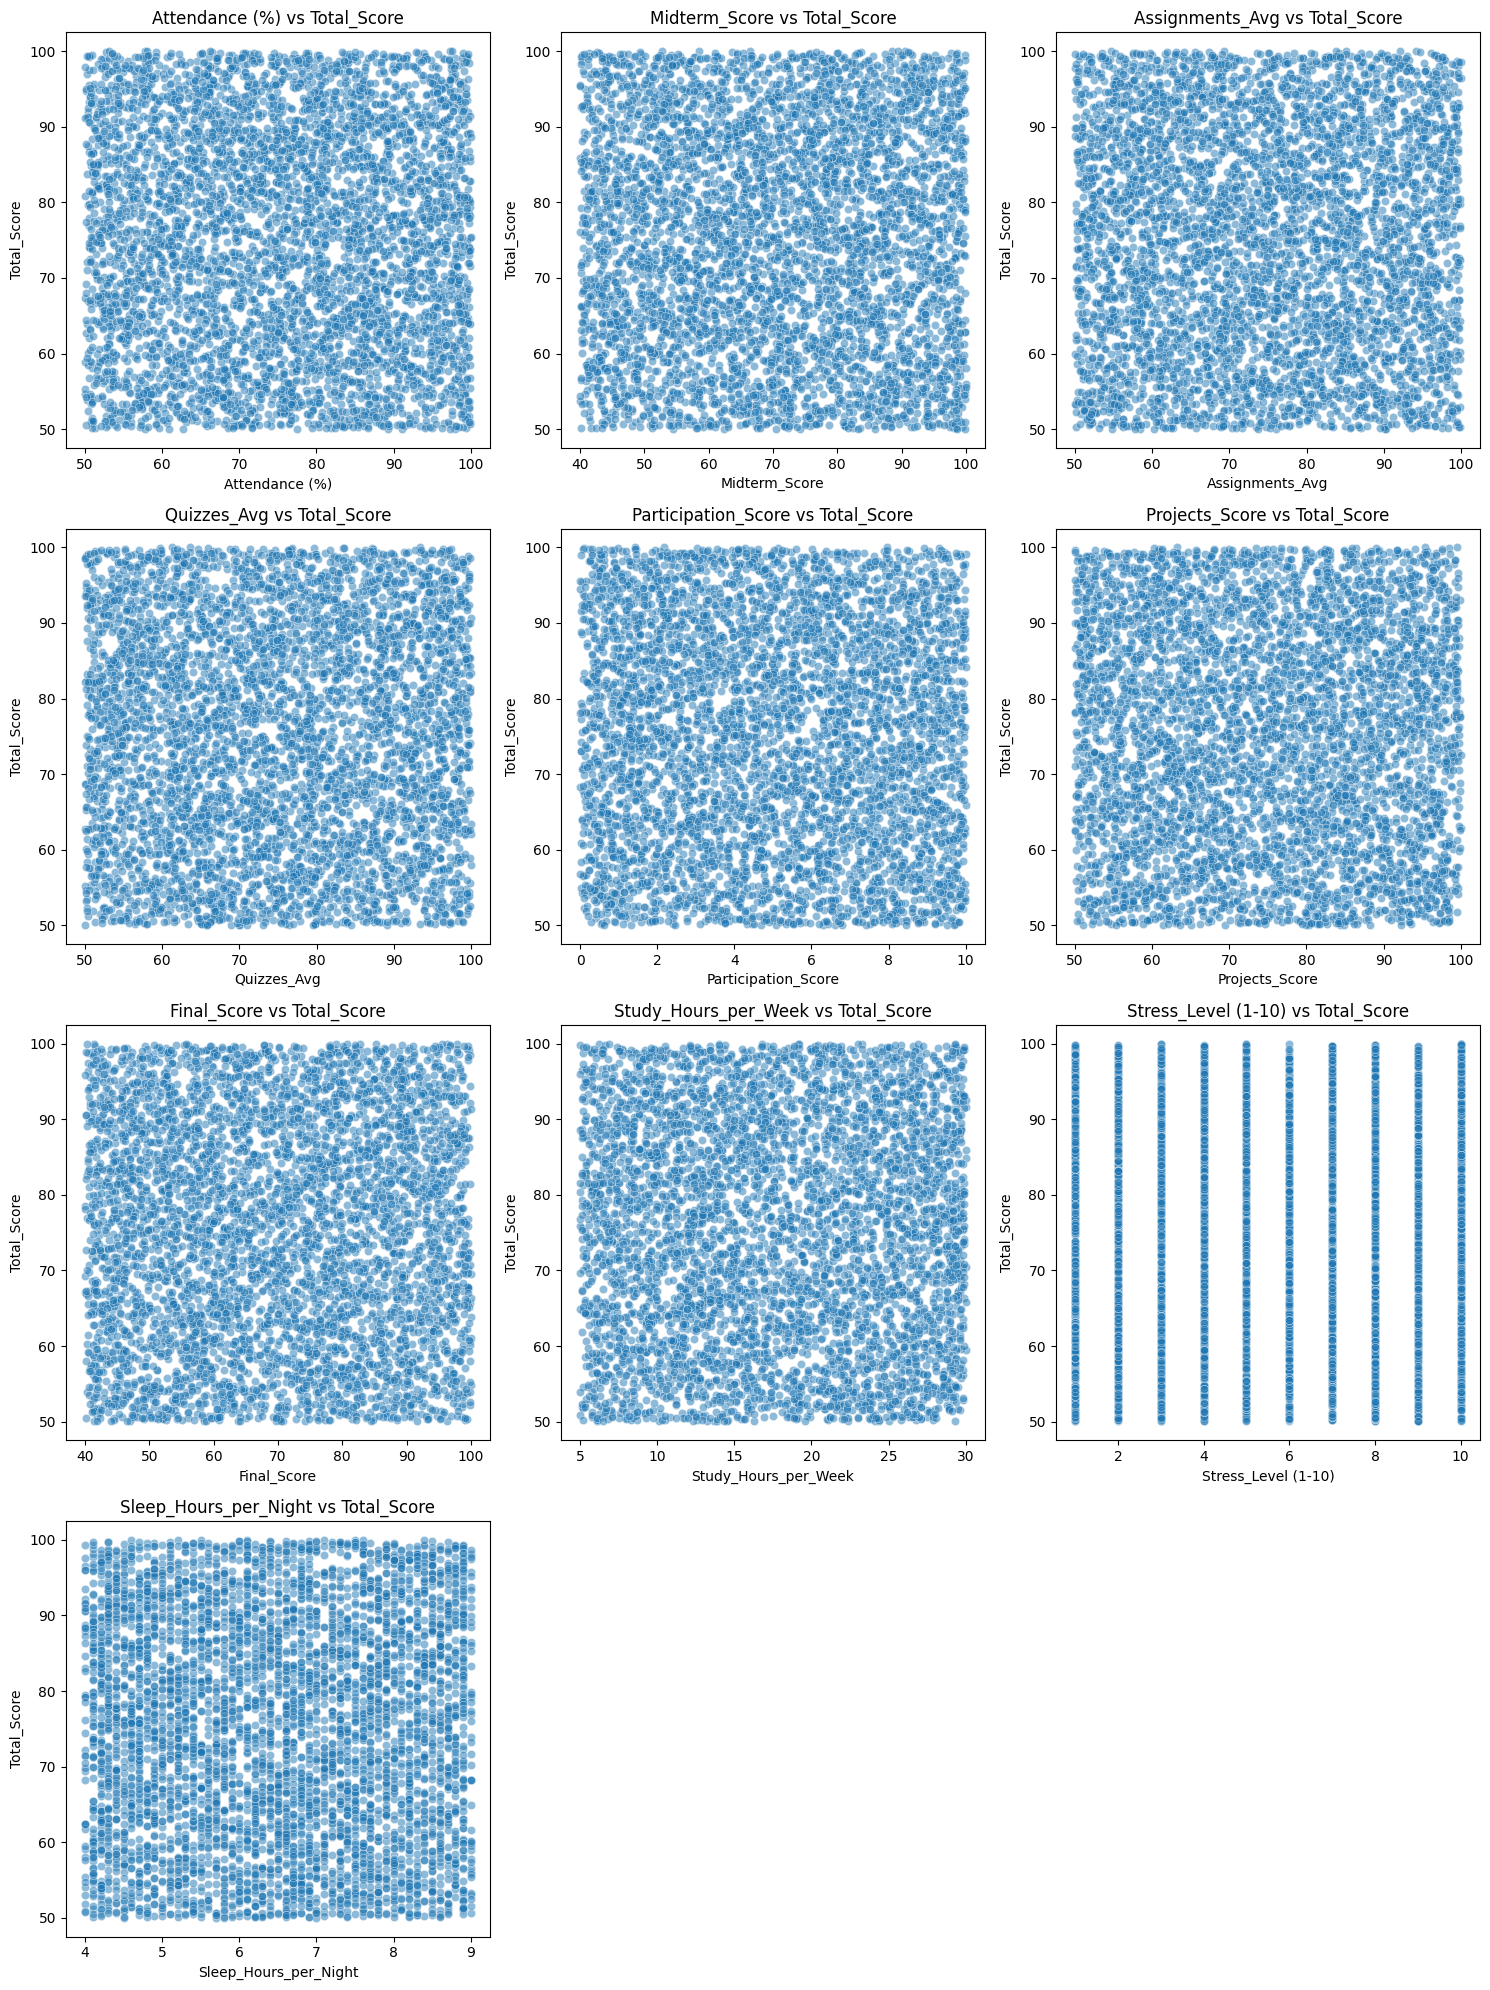

In [ ]:
plot_scatter_matrix_features(data, target, important_features)

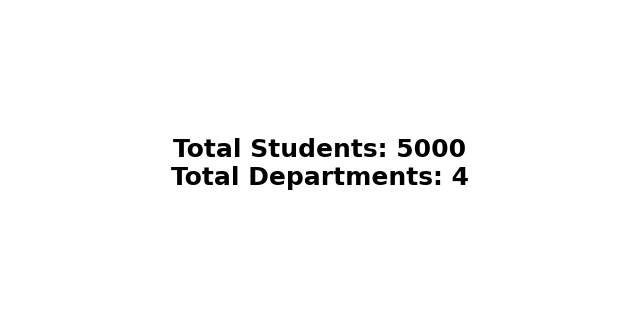

In [ ]:

num_students = data.shape[0]
num_departments = data["Department"].nunique()
students_per_department = data["Department"].value_counts()
fig1, ax1 = plt.subplots(figsize=(8, 4))
text = f"Total Students: {num_students}\nTotal Departments: {num_departments}"
ax1.text(0.5, 0.5, text, fontsize=18, ha='center', va='center', fontweight='bold')

ax1.axis("off")

plt.show()



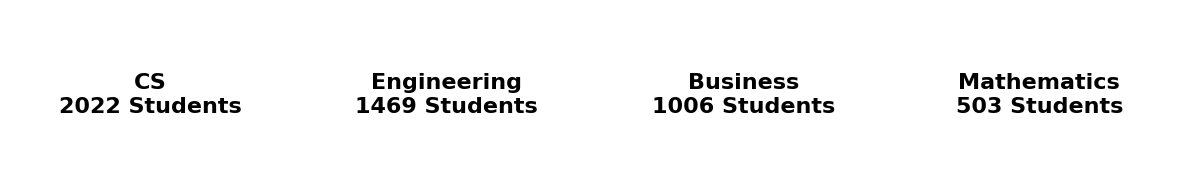

In [ ]:

num_depts = len(students_per_department)
cols = min(4, num_depts)
rows = (num_depts // cols) + (num_depts % cols > 0)
fig2, axes = plt.subplots(rows, cols, figsize=(12,  rows * 2))

if rows == 1:
    axes = [axes]

for i, (dept, count) in enumerate(students_per_department.items()):
    row = i // cols
    col = i % cols
    axes[row][col].text(0.5, 0.5, f"{dept}\n{count} Students", fontsize=16, ha='center', va='center', fontweight='bold')

    axes[row][col].axis("off")
for j in range(i % cols + 1, cols):
    fig2.delaxes(axes[-1][j])

plt.tight_layout()
plt.show()



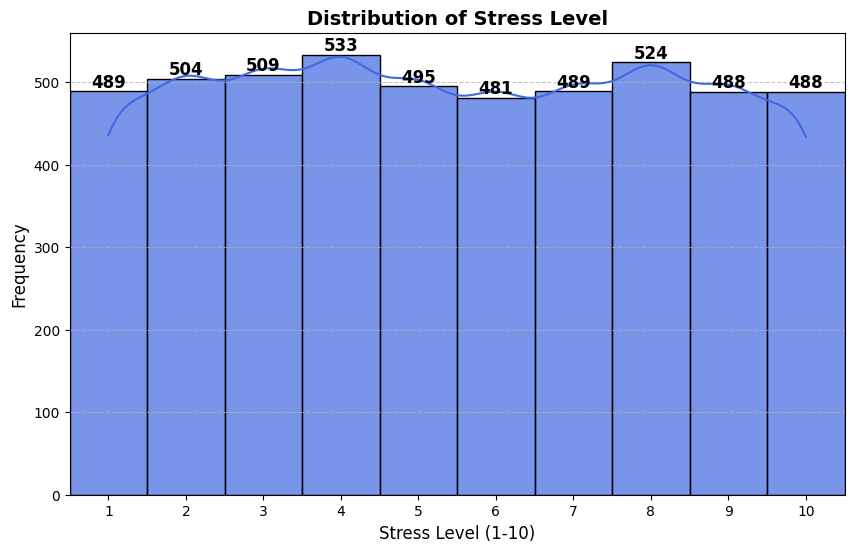

In [ ]:


plt.figure(figsize=(10, 6))

ax = sns.histplot(data["Stress_Level (1-10)"], bins=np.arange(0.5, 11.5, 1), kde=True,
                  color="royalblue", alpha=0.7, edgecolor="black")
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f"{int(p.get_height())}",
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha="center", va="bottom", fontsize=12, fontweight="bold", color="black")


plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(ticks=np.arange(1, 11, 1))
plt.xlim(0.5, 10.5)
plt.title("Distribution of Stress Level", fontsize=14, fontweight="bold")
plt.xlabel("Stress Level (1-10)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.show()


<Figure size 1200x600 with 0 Axes>

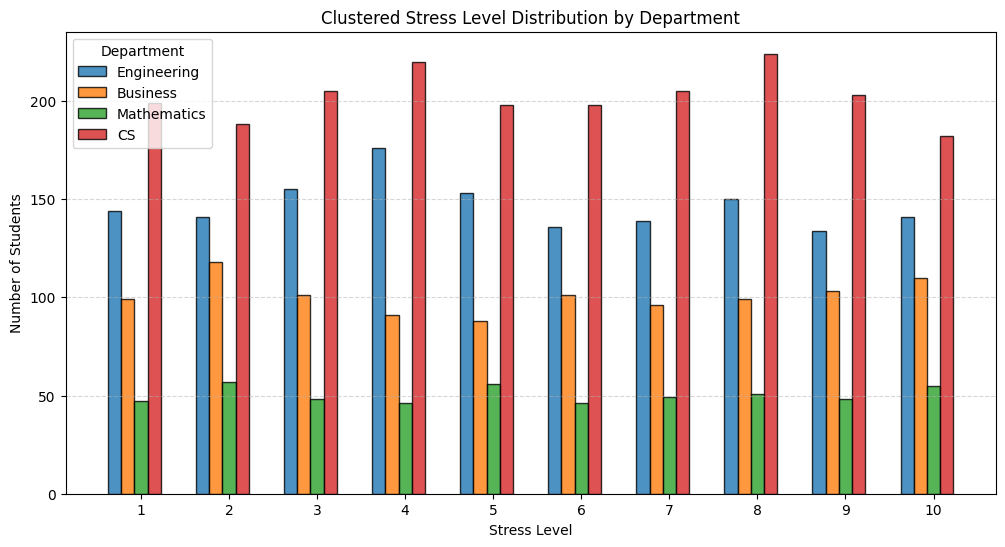

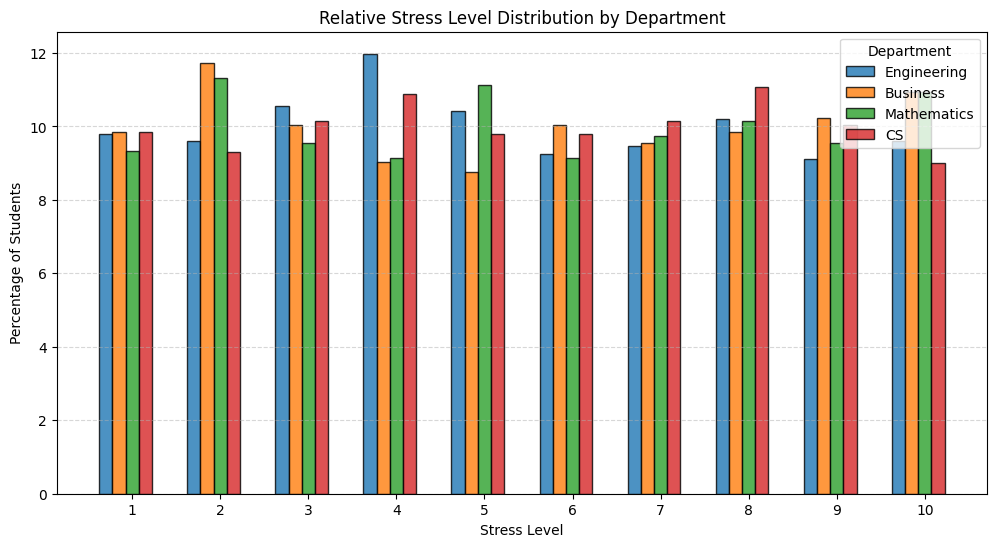

In [ ]:
plot_clustered_distribution(
    data,
    feature="Stress_Level (1-10)",
    group_by_col="Department",
    xlabel="Stress Level",
    title_count="Clustered Stress Level Distribution by Department",
    title_percentage="Relative Stress Level Distribution by Department"
)



<Figure size 1200x600 with 0 Axes>

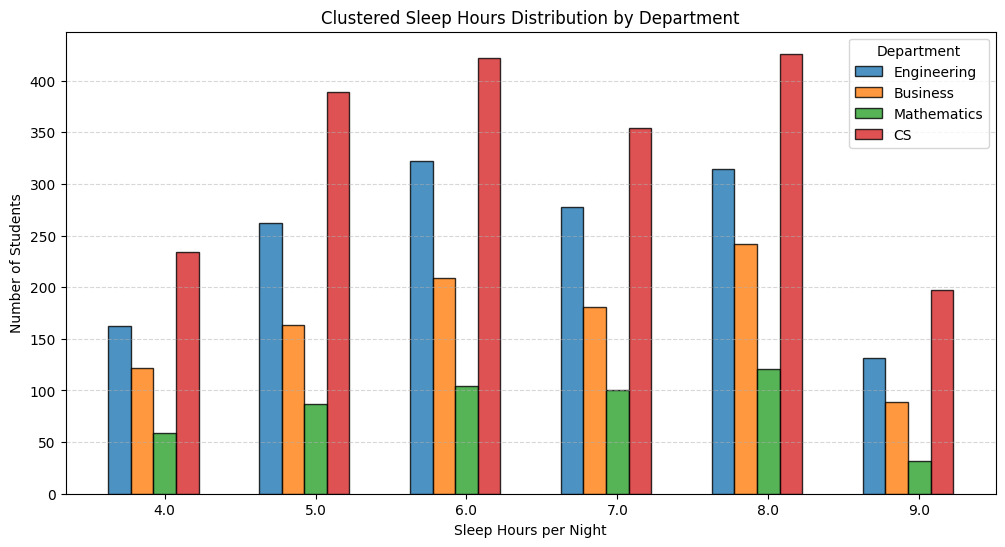

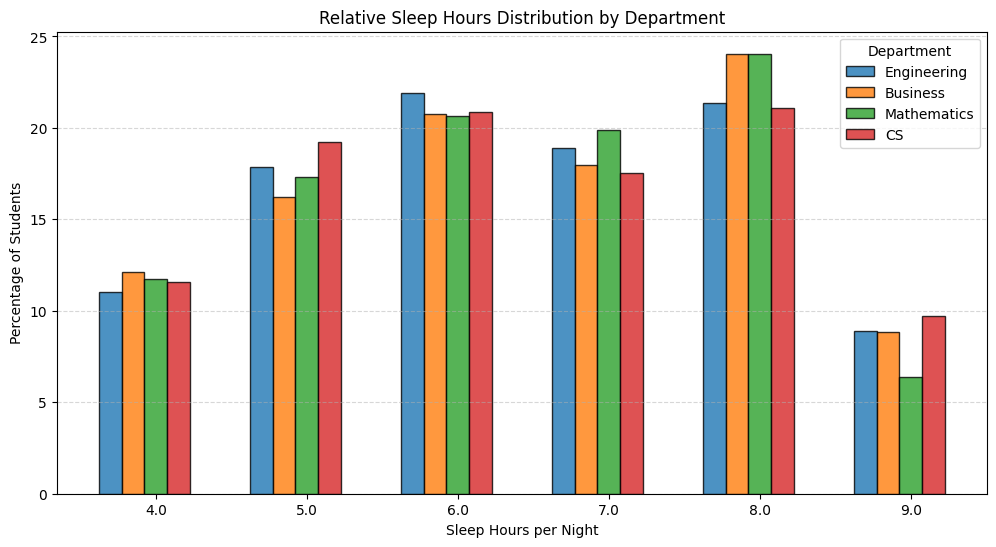

In [ ]:

data["Sleep_Hours_per_Night"] = data["Sleep_Hours_per_Night"].round()

plot_clustered_distribution(
    data,
    feature="Sleep_Hours_per_Night",
     group_by_col="Department",
    xlabel="Sleep Hours per Night",
    title_count="Clustered Sleep Hours Distribution by Department",
    title_percentage="Relative Sleep Hours Distribution by Department"
)


<Figure size 1200x600 with 0 Axes>

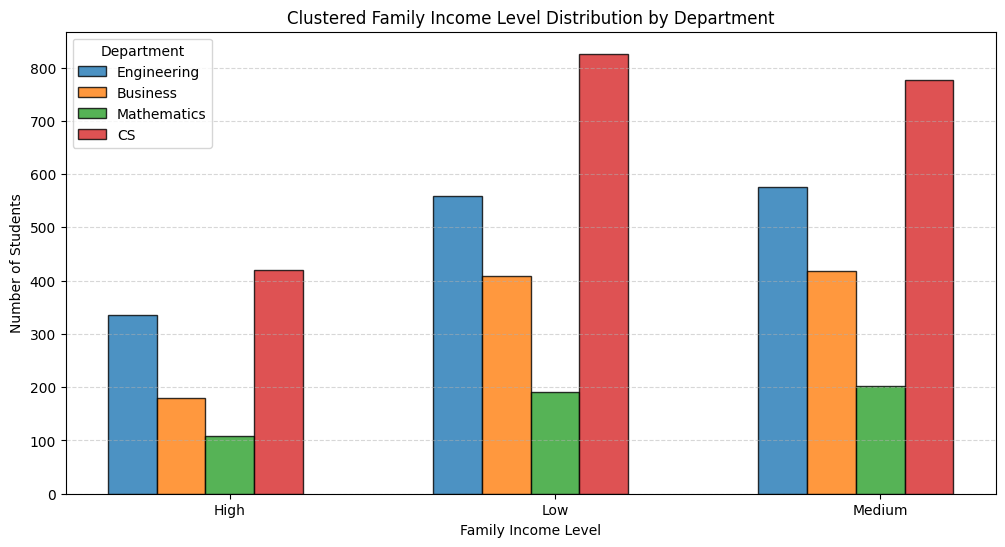

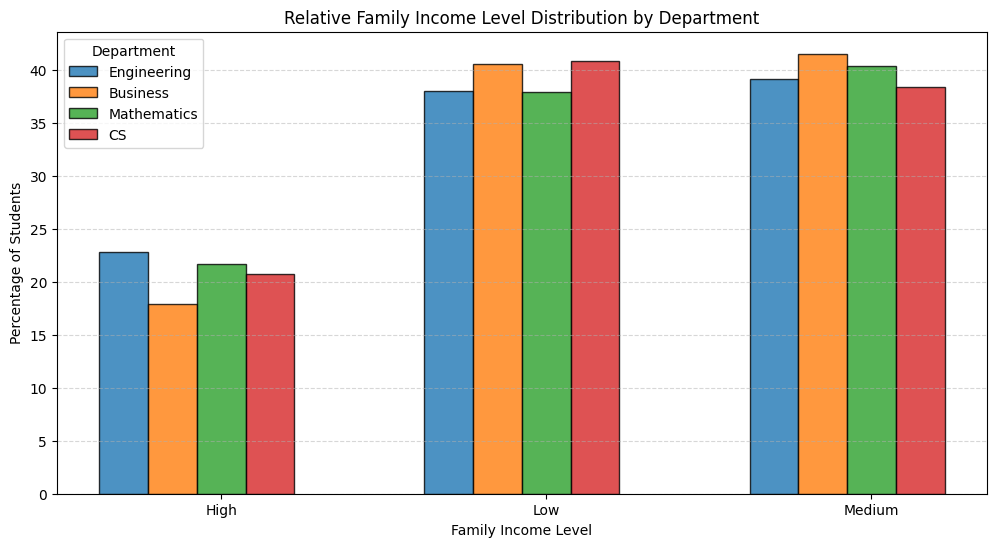

In [ ]:
plot_clustered_distribution(
    data,
    feature="Family_Income_Level",
    group_by_col="Department",
    xlabel="Family Income Level",
    title_count="Clustered Family Income Level Distribution by Department",
    title_percentage="Relative Family Income Level Distribution by Department"
)


<Figure size 1200x600 with 0 Axes>

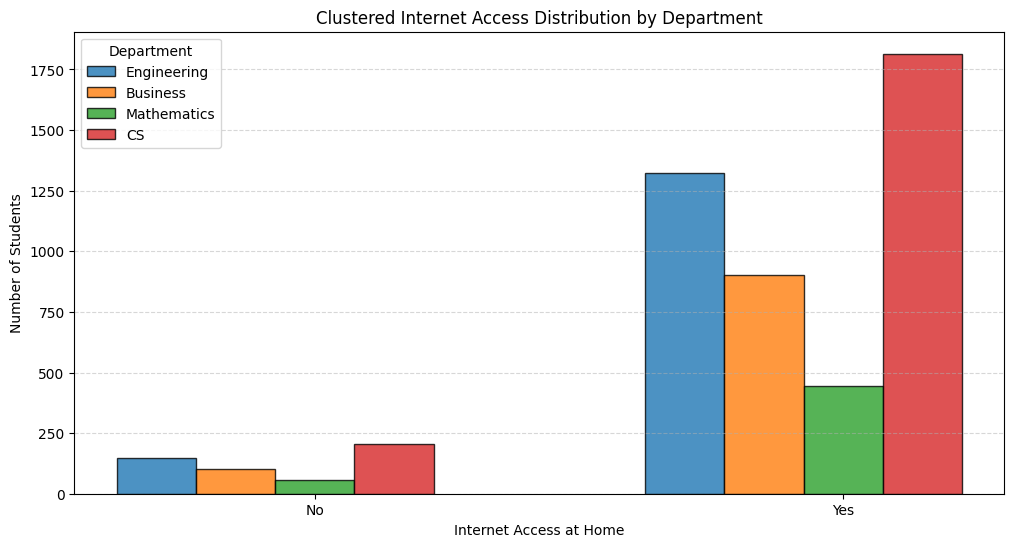

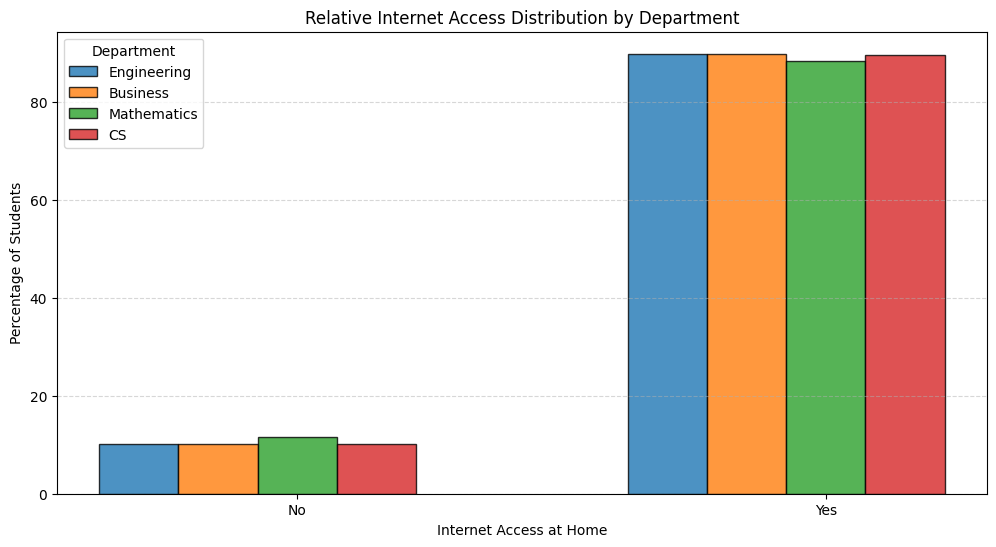

In [ ]:
plot_clustered_distribution(
    data,
    feature="Internet_Access_at_Home",
      group_by_col="Department",
    xlabel="Internet Access at Home",
    title_count="Clustered Internet Access Distribution by Department",
    title_percentage="Relative Internet Access Distribution by Department"
)


<Figure size 1200x600 with 0 Axes>

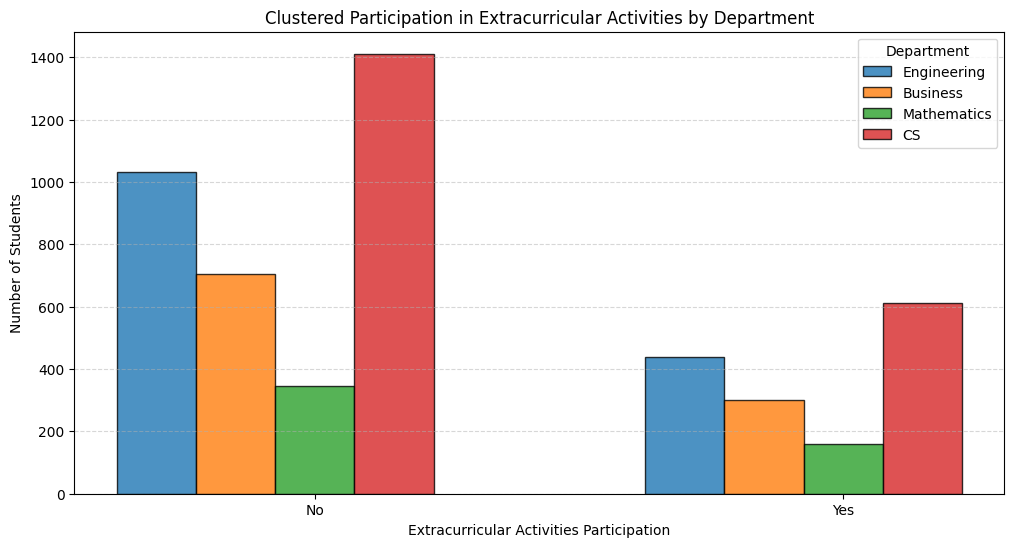

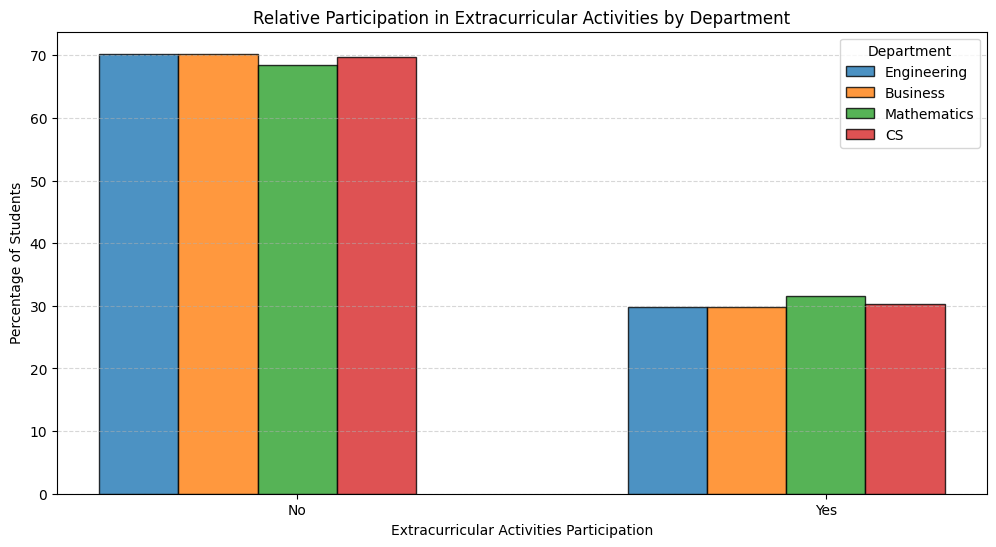

In [ ]:
plot_clustered_distribution(
    data,
    feature="Extracurricular_Activities",
    group_by_col="Department",
    xlabel="Extracurricular Activities Participation",
    title_count="Clustered Participation in Extracurricular Activities by Department",
    title_percentage="Relative Participation in Extracurricular Activities by Department"
)


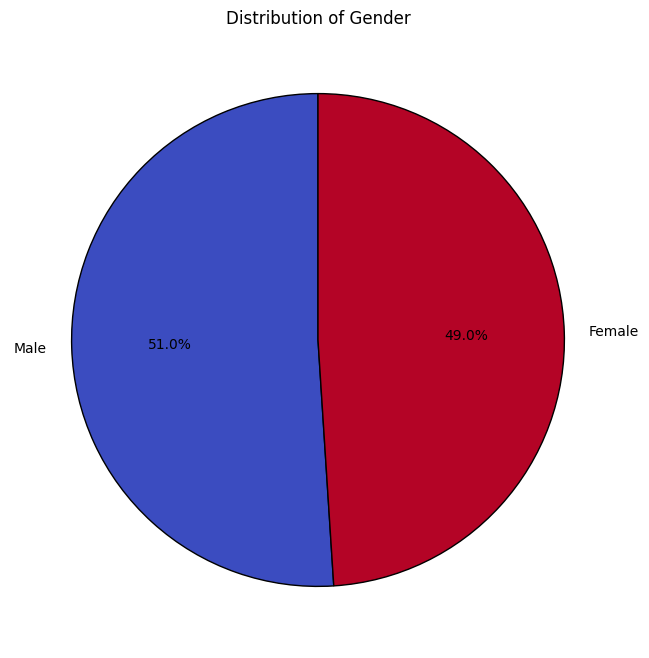

In [ ]:
plot_pie_chart(data, "Gender", "Distribution of Gender")


<Figure size 1200x600 with 0 Axes>

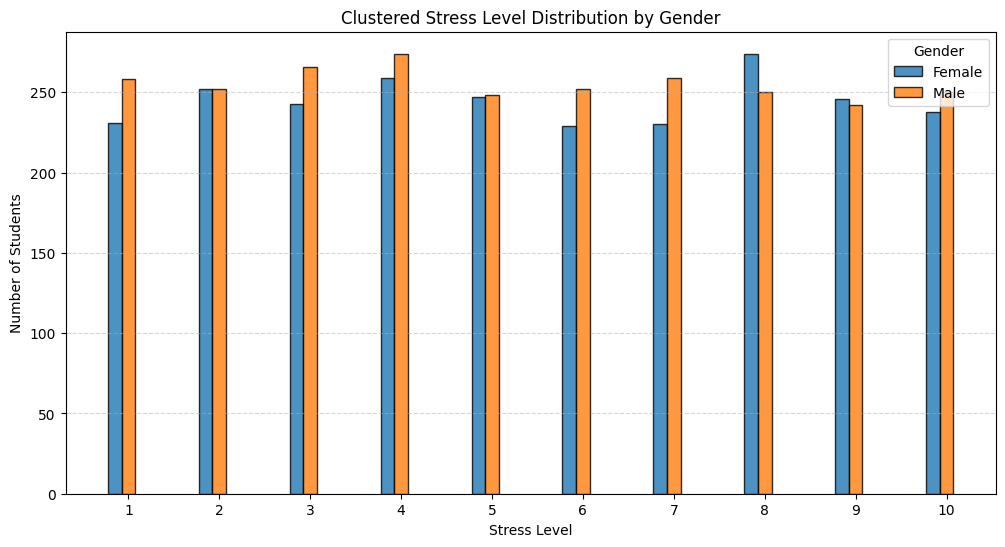

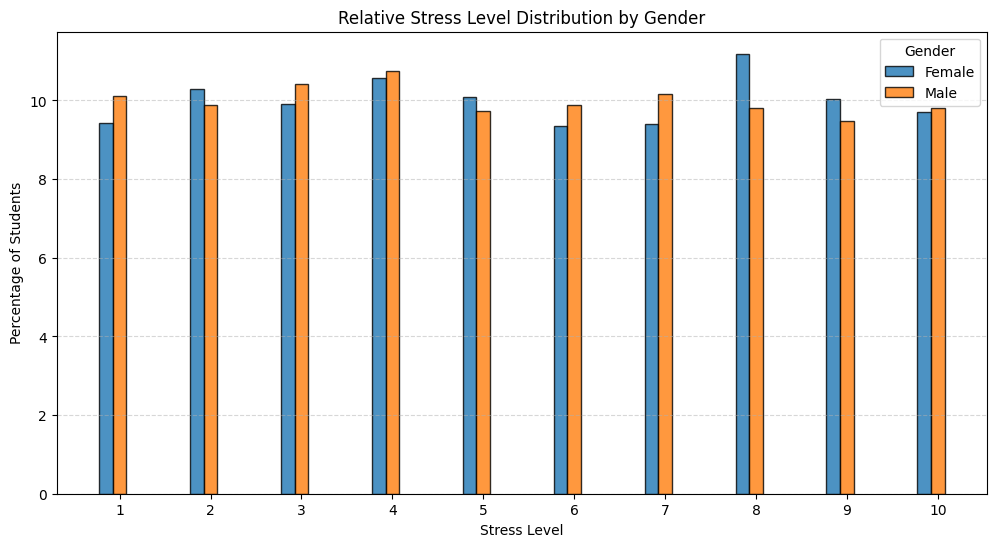

In [ ]:
plot_clustered_distribution(
    data,
    feature="Stress_Level (1-10)",
    group_by_col="Gender",
    xlabel="Stress Level",
    title_count="Clustered Stress Level Distribution by Gender",
    title_percentage="Relative Stress Level Distribution by Gender"
)


<Figure size 1200x600 with 0 Axes>

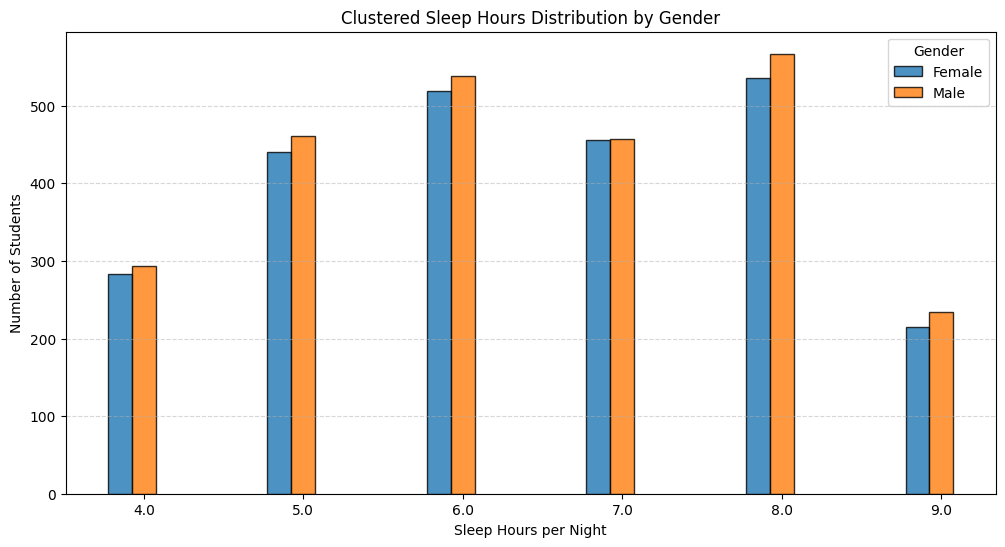

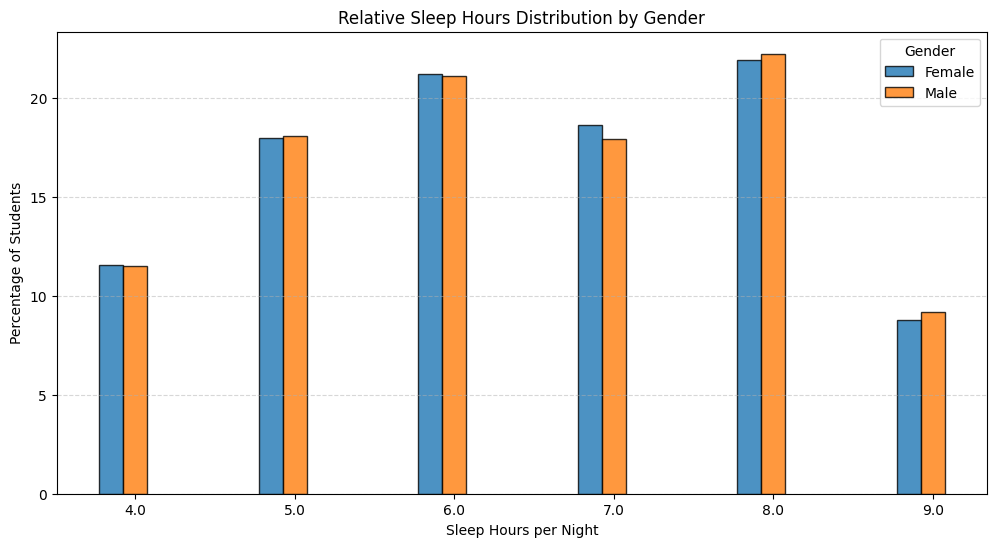

In [ ]:
plot_clustered_distribution(
    data,
    feature="Sleep_Hours_per_Night",
    group_by_col="Gender",
    xlabel="Sleep Hours per Night",
    title_count="Clustered Sleep Hours Distribution by Gender",
    title_percentage="Relative Sleep Hours Distribution by Gender"
)


<Figure size 1200x600 with 0 Axes>

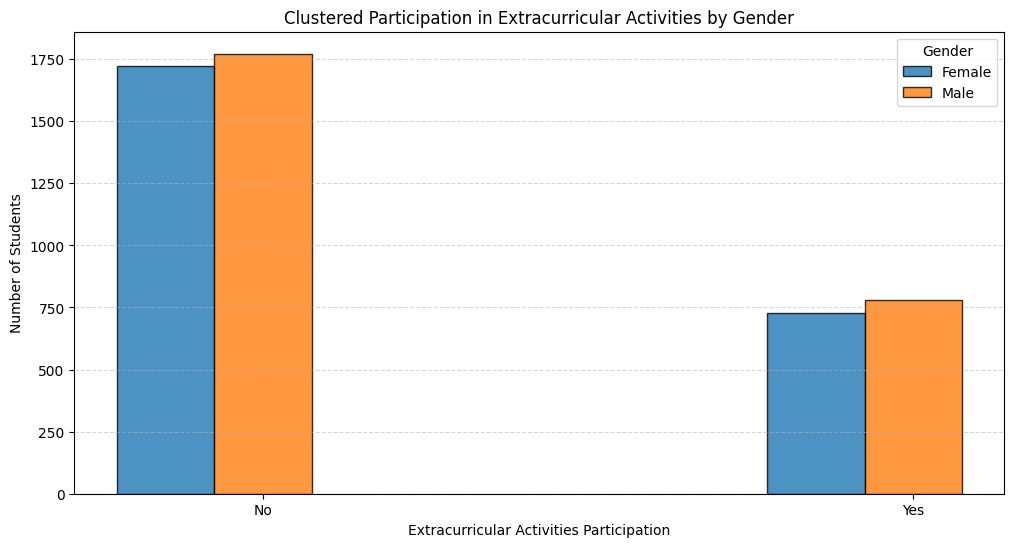

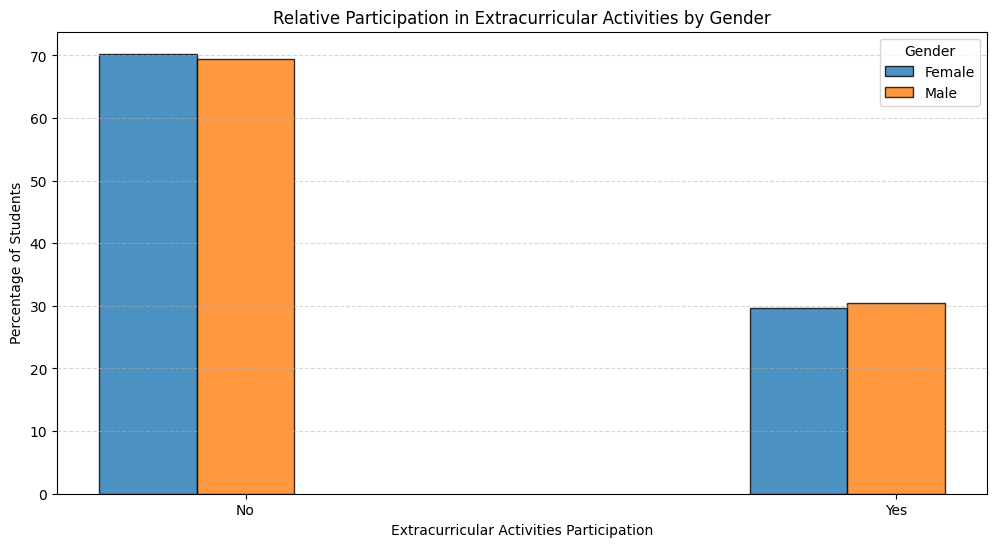

In [ ]:
plot_clustered_distribution(
    data,
    feature="Extracurricular_Activities",
    group_by_col="Gender",
    xlabel="Extracurricular Activities Participation",
    title_count="Clustered Participation in Extracurricular Activities by Gender",
    title_percentage="Relative Participation in Extracurricular Activities by Gender"
)


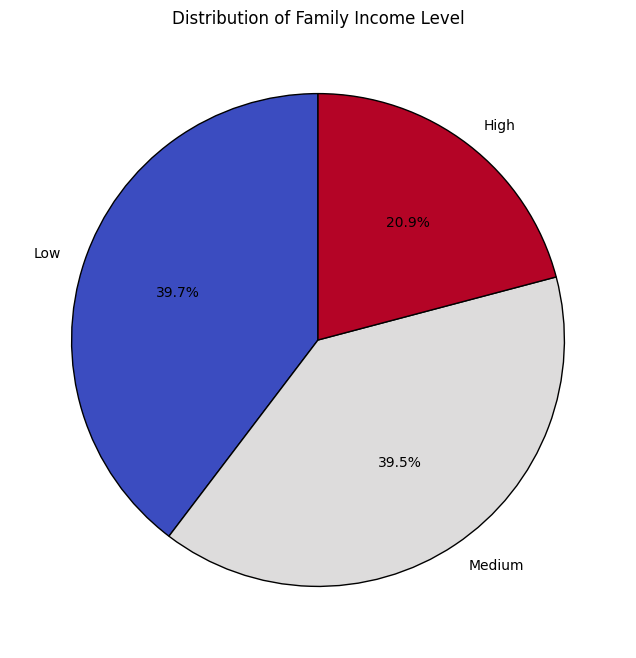

In [ ]:
plot_pie_chart(data, 'Family_Income_Level', "Distribution of Family Income Level")

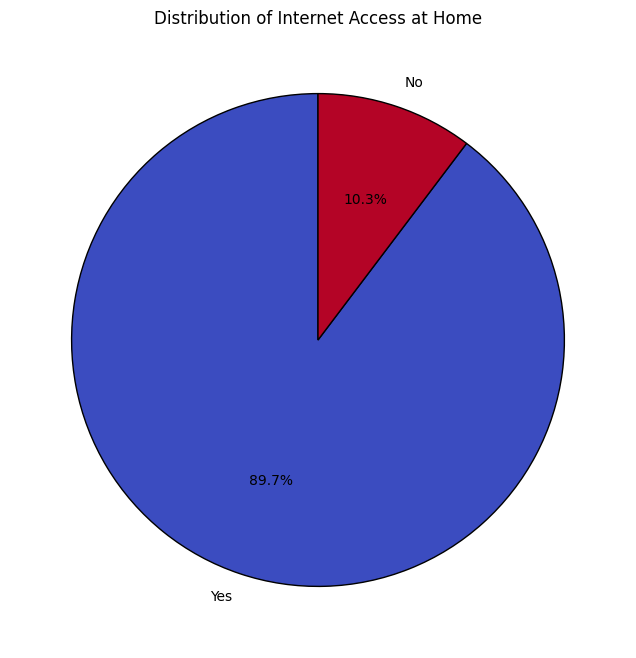

In [ ]:
plot_pie_chart(data, 'Internet_Access_at_Home', "Distribution of Internet Access at Home")

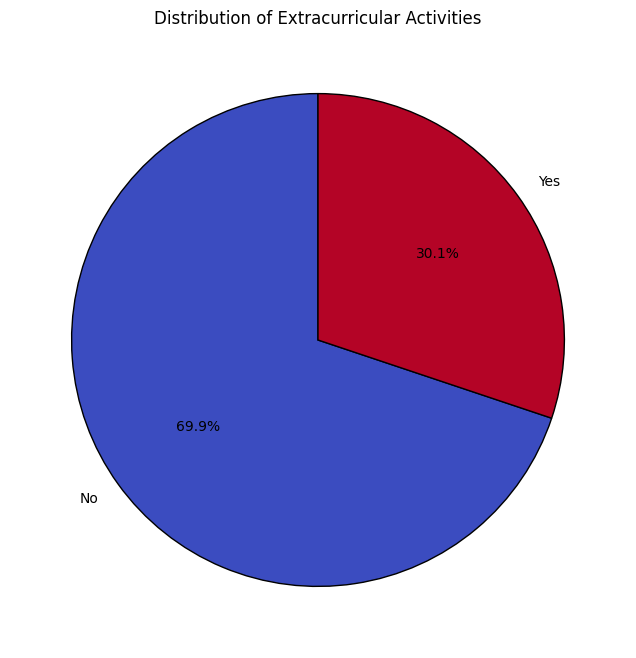

In [ ]:
plot_pie_chart(data, 'Extracurricular_Activities', "Distribution of Extracurricular Activities")

In [ ]:

bins = [50, 60, 70, 80, 90, 100]
labels = ["F", "D", "C", "B", "A"]

data["Grade"] = pd.cut(data["Total_Score"], bins=bins, labels=labels, include_lowest=True)

print(data[["Total_Score", "Grade"]].head())


   Total_Score Grade
0        56.09     F
1        50.64     F
2        70.30     C
3        61.63     D
4        66.13     D


In [ ]:
data = data[(data["Total_Score"] >= 50) & (data["Total_Score"] <= 100)]


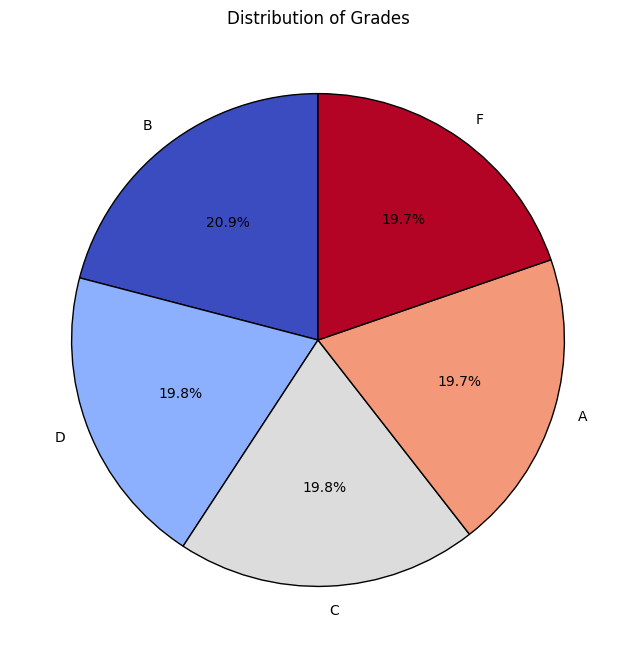

In [ ]:
plot_pie_chart(data, 'Grade', "Distribution of Grades")

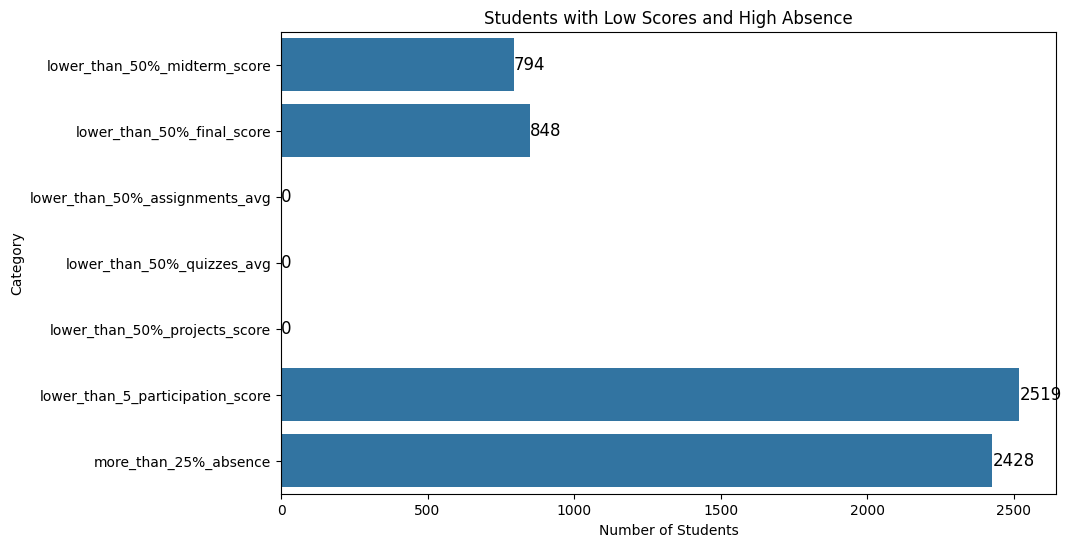

In [ ]:


data["absence_percentage"] = 100 - data["Attendance (%)"]
num_absent_students = (data["absence_percentage"] > 25).sum()

score_columns = ["Midterm_Score", "Final_Score", "Assignments_Avg", "Quizzes_Avg", "Projects_Score"]


low_scores = {f"lower_than_50%_{col.lower()}": (data[col] < 50).sum() for col in score_columns}

low_scores["lower_than_5_participation_score"] = (data["Participation_Score"] < 5).sum()

low_scores["more_than_25%_absence"] = num_absent_students


low_scores_df = pd.DataFrame(list(low_scores.items()), columns=["category", "count"])

plt.figure(figsize=(10, 6))
sns.barplot(x="count", y="category", data=low_scores_df)


plt.xlabel("Number of Students")
plt.ylabel("Category")
plt.title("Students with Low Scores and High Absence")


for index, value in enumerate(low_scores_df["count"]):
    plt.text(value + 0.5, index, str(value), va="center", fontsize=12)

plt.show()


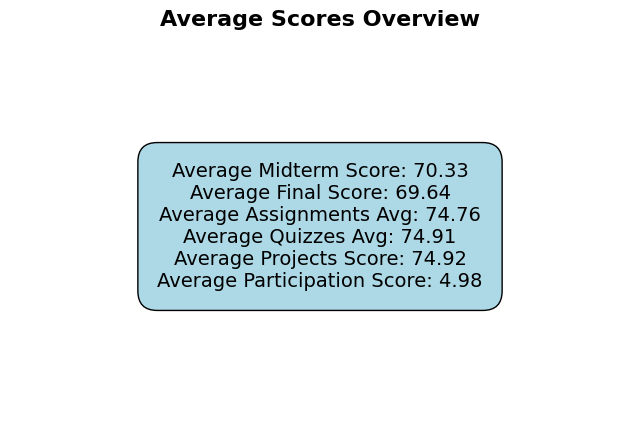

In [ ]:

average_scores = {
    "average_midterm_score": data["Midterm_Score"].mean(),
    "average_final_score": data["Final_Score"].mean(),
    "average_assignments_avg": data["Assignments_Avg"].mean(),
    "average_quizzes_avg": data["Quizzes_Avg"].mean(),
    "average_projects_score": data["Projects_Score"].mean(),
    "average_participation_score": data["Participation_Score"].mean(),
}


avg_scores_df = pd.DataFrame(list(average_scores.items()), columns=["Category", "Average"])


fig, ax = plt.subplots(figsize=(8, 5))
ax.axis("off")

text = "\n".join([f"{row['Category'].replace('_', ' ').title()}: {row['Average']:.2f}" for _, row in avg_scores_df.iterrows()])

ax.text(0.5, 0.5, text, fontsize=14, ha="center", va="center", bbox=dict(facecolor="lightblue", edgecolor="black", boxstyle="round,pad=1"))

plt.title("Average Scores Overview", fontsize=16, fontweight="bold")

plt.show()
